In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Maximisation diversité et pertinence par bruteforce

(-8.795770956018755,
 8.799798616953273,
 -1.0998615404412626,
 1.0998615404412626)

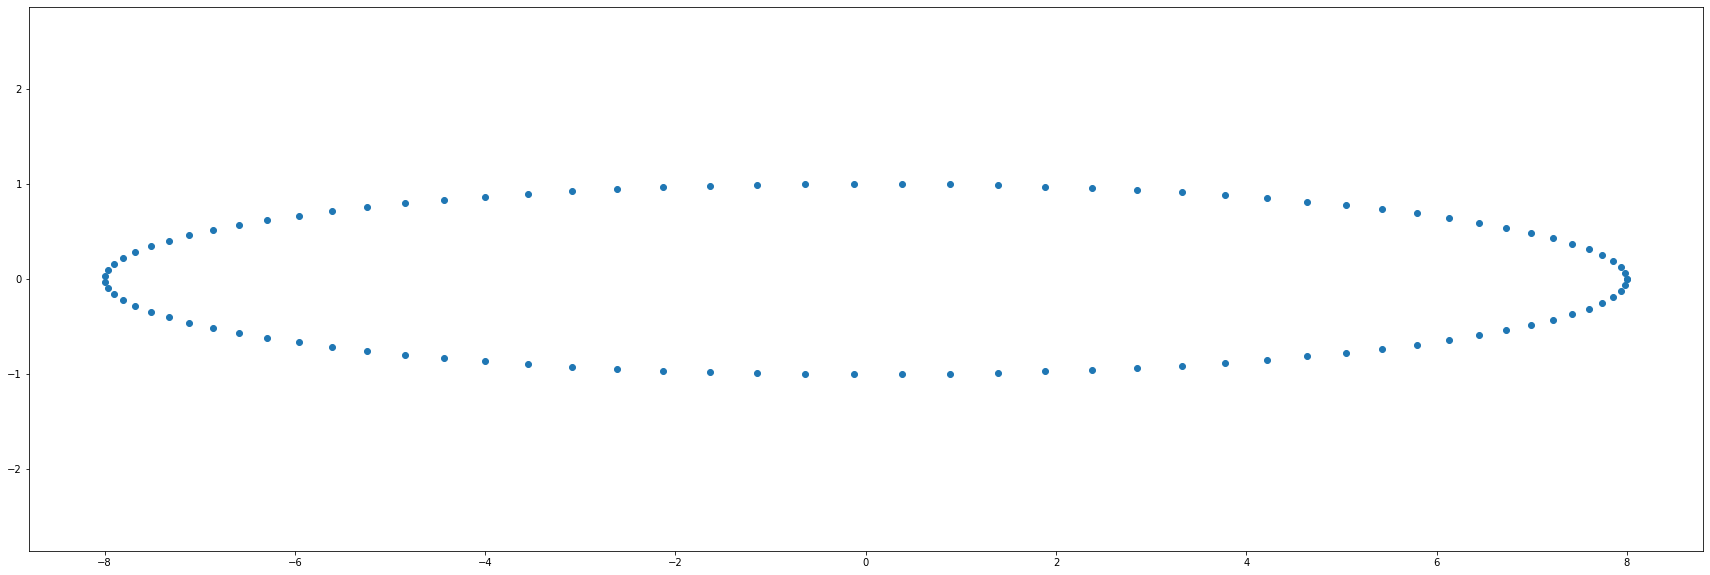

In [19]:
def ellipsePoints(a, b, nbPoints):
    
    t_list = np.linspace(0, 2*np.pi, nbPoints)
    x = [a*np.cos(t) for t in t_list]
    y = [b*np.sin(t) for t in t_list]
    
    return x, y


x, y = ellipsePoints(8, 1, 100)

fig = plt.figure(figsize=(30, 10))
plt.scatter(x, y)
plt.axis('equal')

In [20]:
def maxPertinence(x, y):
    N = len(x)
    max_ij = (0, 0)
    max_p = 0
    
    for i in range(N):
        for j in range(i):
            p = (x[i]**2 + y[i]**2)*(x[j]**2 + y[j]**2)
            if p > max_p:
                max_p = p
                max_ij = (i, j)
    
    return max_ij


def maxDiversite(x, y):
    N = len(x)
    min_ij = (0, 0)
    min_d = 2
    
    for i in range(N):
        for j in range(i):
            d = abs((x[i]*x[j] + y[i]*y[j])/((x[i]**2 + y[i]**2)*(x[j]**2 + y[j]**2)))
            if d < min_d:
                min_d = d
                min_ij = (i, j)
    
    return min_ij


def dpp(x, y):
    N = len(x)
    p = np.zeros([N, N]);
    
    for i in range(N):
        for j in range(N):
            p[i, j] = np.linalg.det(np.array([[x[i], y[i]], [x[j], y[j]]]))
            
    i, j = np.where(p == np.max(p))
    i, j = i[0], j[0]
    
    return i, j

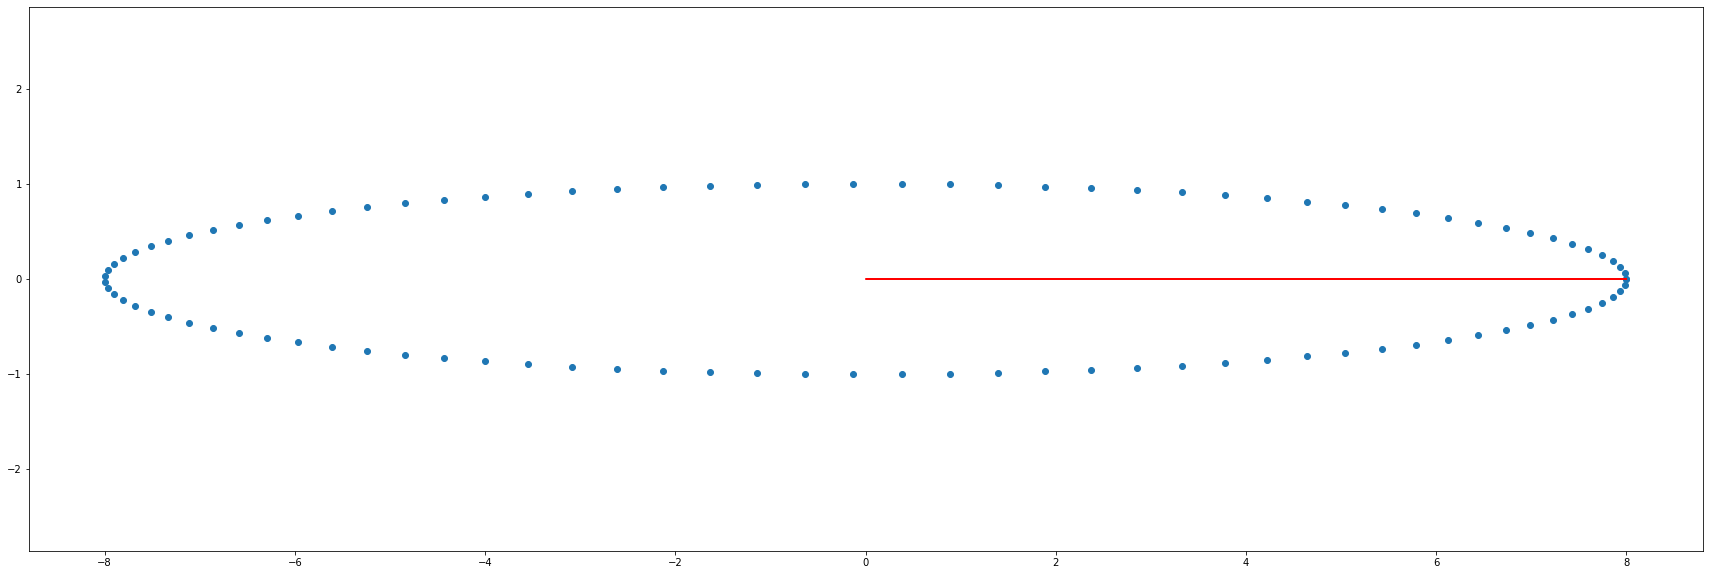

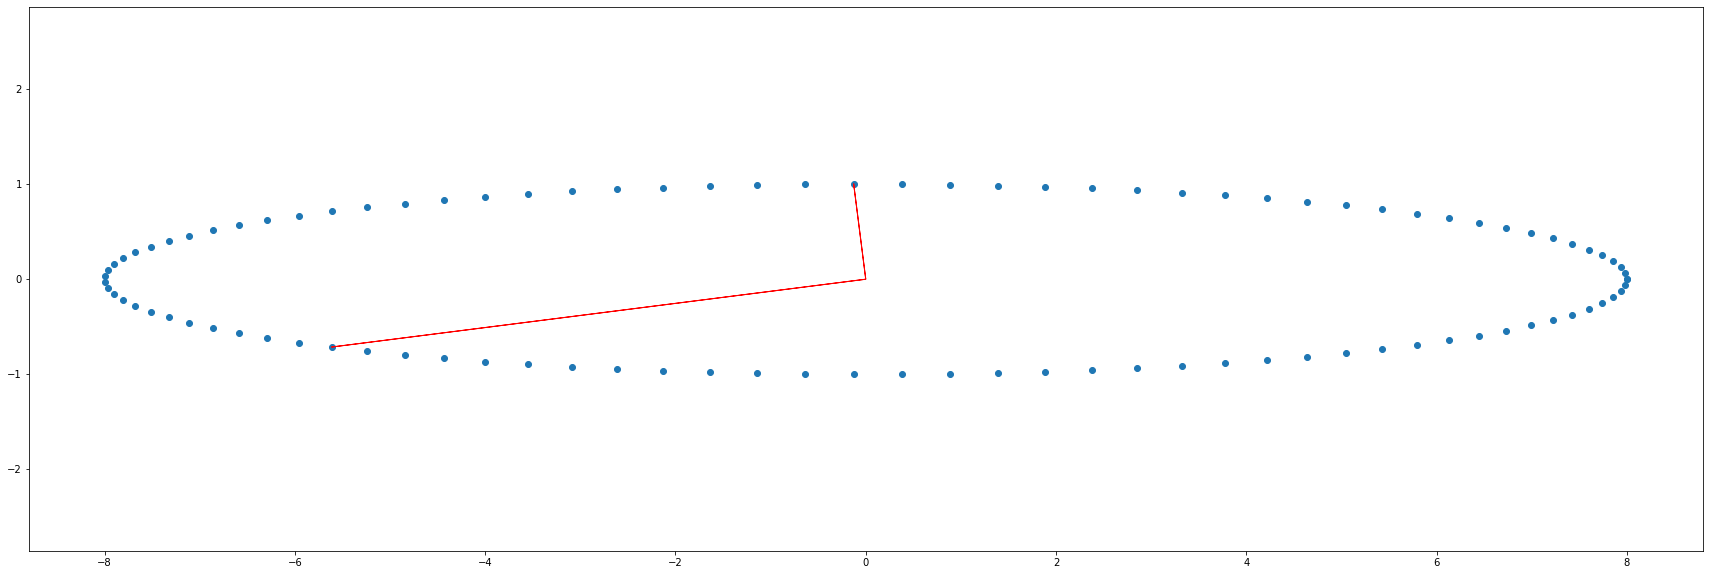

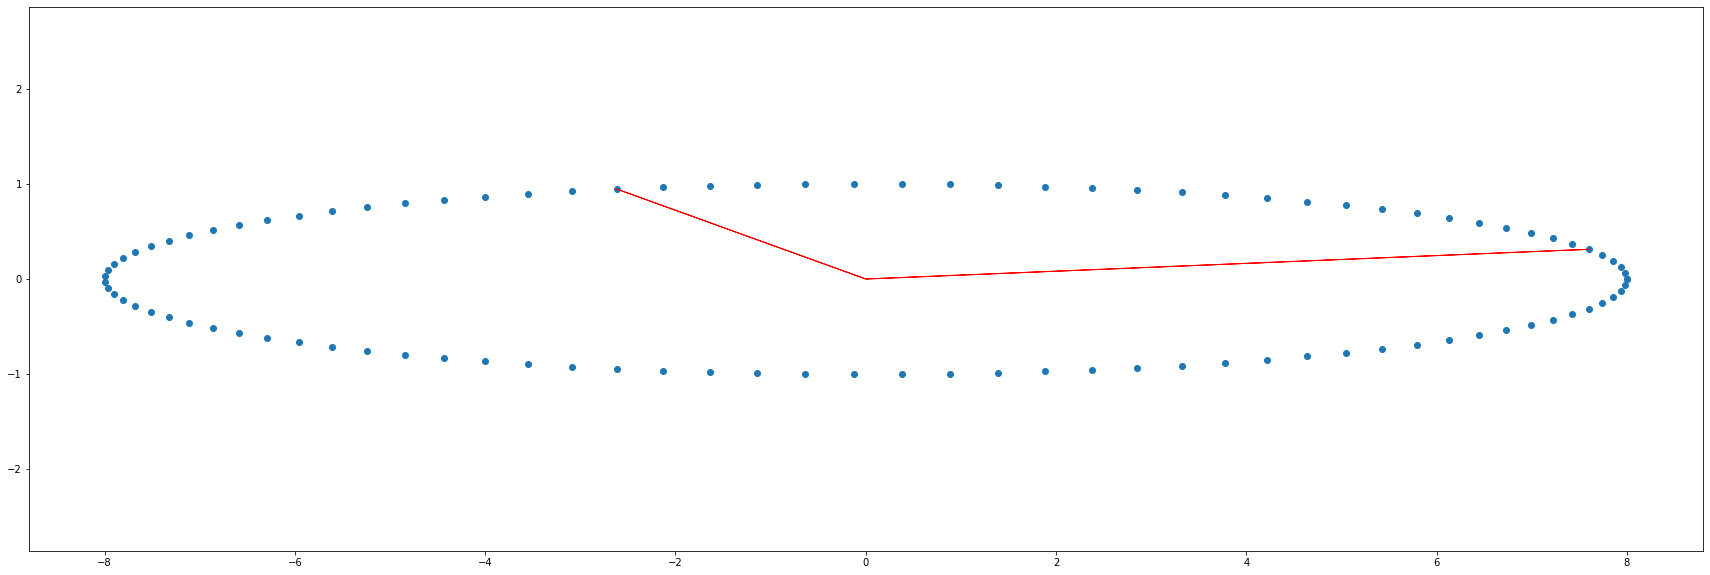

In [25]:
x, y = ellipsePoints(8, 1, 100)

# Perimetre max
i1, j1 = maxPertinence(x, y)
# Angle min
i2, j2 = maxDiversite(x, y)
# Aire max
i3, j3 = dpp(x, y)

#np.linalg.det(np.array([[x[test1], y[test1]], [x[test2], y[test2]]]))

fig = plt.figure(figsize=(30, 10))
plt.scatter(x, y)
plt.arrow(0, 0, x[i1], y[i1], color = 'r')
plt.arrow(0, 0, x[j1], y[j1], color = 'r')
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(30, 10))
plt.scatter(x, y)
plt.arrow(0, 0, x[i2], y[i2], color = 'r')
plt.arrow(0, 0, x[j2], y[j2], color = 'r')
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(30, 10))
plt.scatter(x, y)
plt.arrow(0, 0, x[i3], y[i3], color = 'r')
plt.arrow(0, 0, x[j3], y[j3], color = 'r')
plt.axis('equal')
plt.show()

# Maximisation pertinence et diversité par DPP

In [14]:
from dppy.finite_dpps import FiniteDPP
from dppy.utils import example_eval_L_linear

L (likelihood) kernel computed via:
- L = eval_L(X_data, X_data)
[25, 44]


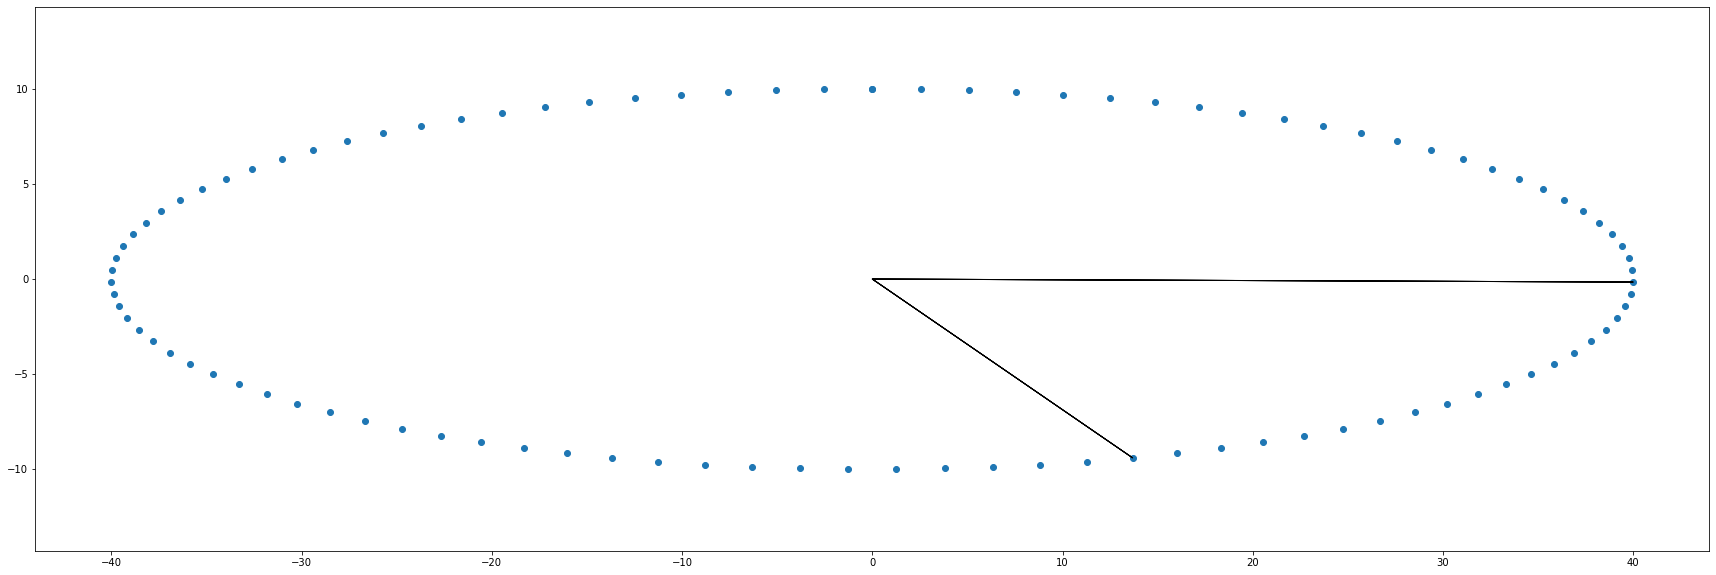

In [32]:
def ellipsePoints(a, b, nbPoints,c1,c2):

    t_list = np.linspace(0, 2*np.pi, nbPoints)
    x = [c1+a*np.cos(t) for t in t_list] 
    y = [c2+b*np.sin(t) for t in t_list]

    return x, y

x, y = ellipsePoints(10, 40, 100, 0, 0 )
#fig = plt.figure(figsize=(30, 10))
#plt.scatter(x, y)
#plt.show()

phi = [ [xi,yi] for xi,yi in zip(y,x)]

L = np.matmul(np.asarray(phi),np.asarray(phi).T)



#DPP = FiniteDPP('likelihood', **{'L': L})
DPP = FiniteDPP('likelihood', **{'L_eval_X_data': (example_eval_L_linear , np.asarray(phi))})

# Sample
K = 2
samples = DPP.sample_exact_k_dpp(size=K)
print(samples)
DPP.compute_K

fig = plt.figure(figsize=(30, 10))
plt.scatter(y, x)
plt.axis('equal')
for i in range(len(samples)):
    plt.arrow(0, 0, y[samples[i]], x[samples[i]])
    plt.arrow(0, 0, y[samples[i]], x[samples[i]])